## K-Nearest Neighbors Classifier

#### We use the [kagglehub](https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset) package to download a dataset related to `mobile device usage and user behavior`.

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("valakhorasani/mobile-device-usage-and-user-behavior-dataset")

print("Path to dataset files:", path)


/home/shinigami/new/AI2/AI_3.10/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/shinigami/.cache/kagglehub/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset/versions/1


##### We load the dataset into a pandas DataFrame and replace categorical values in the `Operating System` and `Gender` columns with numerical ones. The first few rows of the dataset are displayed.

In [8]:
import pandas as pd

df = pd.read_csv("user_behavior_dataset.csv")
df['Operating System'] = df['Operating System'].replace({'Android': 1, 'iOS': 0})
df['Gender'] =df['Gender'].replace({'Male': 1 ,'Female': 0 })
df.head()


/tmp/ipykernel_7194/1529992987.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Operating System'] = df['Operating System'].replace({'Android': 1, 'iOS': 0})
/tmp/ipykernel_7194/1529992987.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] =df['Gender'].replace({'Male': 1 ,'Female': 0 })


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,1,393,6.4,1872,67,1122,40,1,4
1,2,OnePlus 9,1,268,4.7,1331,42,944,47,0,3
2,3,Xiaomi Mi 11,1,154,4.0,761,32,322,42,1,2
3,4,Google Pixel 5,1,239,4.8,1676,56,871,20,1,3
4,5,iPhone 12,0,187,4.3,1367,58,988,31,0,3


#### We convert the Device Model column into dummy variables __`(one-hot encoding)`__ to make it compatible with machine learning models.

In [9]:
df = pd.get_dummies(df, columns=['Device Model'])
df.head()


,User ID,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Device Model_Google Pixel 5,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12
0,1,1,393,6.4,1872,67,1122,40,1,4,True,False,False,False,False
1,2,1,268,4.7,1331,42,944,47,0,3,False,True,False,False,False
2,3,1,154,4.0,761,32,322,42,1,2,False,False,False,True,False
3,4,1,239,4.8,1676,56,871,20,1,3,True,False,False,False,False
4,5,0,187,4.3,1367,58,988,31,0,3,False,False,False,False,True


#### We move the target column `User Behavior Class` to the last position in the DataFrame for better readability

In [10]:
class_col = df.pop('User Behavior Class')
df.insert(14,'User Behavior Class',class_col)
df.head()

,User ID,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,Device Model_Google Pixel 5,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,User Behavior Class
0,1,1,393,6.4,1872,67,1122,40,1,True,False,False,False,False,4
1,2,1,268,4.7,1331,42,944,47,0,False,True,False,False,False,3
2,3,1,154,4.0,761,32,322,42,1,False,False,False,True,False,2
3,4,1,239,4.8,1676,56,871,20,1,True,False,False,False,False,3
4,5,0,187,4.3,1367,58,988,31,0,False,False,False,False,True,3


#### We replace any boolean values in the DataFrame with `1s and 0s`.

In [11]:
df = df.replace({True: 1, False: 0})
df.head()

/tmp/ipykernel_7194/2427838897.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


,User ID,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,Device Model_Google Pixel 5,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,User Behavior Class
0,1,1,393,6.4,1872,67,1122,40,1,1,0,0,0,0,4
1,2,1,268,4.7,1331,42,944,47,0,0,1,0,0,0,3
2,3,1,154,4.0,761,32,322,42,1,0,0,0,1,0,2
3,4,1,239,4.8,1676,56,871,20,1,1,0,0,0,0,3
4,5,0,187,4.3,1367,58,988,31,0,0,0,0,0,1,3


### We check if there are any missing values in the dataset.



In [12]:
df.isnull().sum()

User ID                            0
Operating System                   0
App Usage Time (min/day)           0
Screen On Time (hours/day)         0
Battery Drain (mAh/day)            0
Number of Apps Installed           0
Data Usage (MB/day)                0
Age                                0
Gender                             0
Device Model_Google Pixel 5        0
Device Model_OnePlus 9             0
Device Model_Samsung Galaxy S21    0
Device Model_Xiaomi Mi 11          0
Device Model_iPhone 12             0
User Behavior Class                0
dtype: int64

#### We check the data types of each column to ensure all features are numerical, which is necessary for model training.

In [13]:
# Check data types of each column
print(df.dtypes)

# Optionally, check if all columns are numerical (int or float)
are_numerical = df.apply(lambda x: pd.api.types.is_numeric_dtype(x)).all()

print("All features are numerical:", are_numerical)


User ID                              int64
Operating System                     int64
App Usage Time (min/day)             int64
Screen On Time (hours/day)         float64
Battery Drain (mAh/day)              int64
Number of Apps Installed             int64
Data Usage (MB/day)                  int64
Age                                  int64
Gender                               int64
Device Model_Google Pixel 5          int64
Device Model_OnePlus 9               int64
Device Model_Samsung Galaxy S21      int64
Device Model_Xiaomi Mi 11            int64
Device Model_iPhone 12               int64
User Behavior Class                  int64
dtype: object
All features are numerical: True


In [14]:
df.head()

,User ID,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,Device Model_Google Pixel 5,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,User Behavior Class
0,1,1,393,6.4,1872,67,1122,40,1,1,0,0,0,0,4
1,2,1,268,4.7,1331,42,944,47,0,0,1,0,0,0,3
2,3,1,154,4.0,761,32,322,42,1,0,0,0,1,0,2
3,4,1,239,4.8,1676,56,871,20,1,1,0,0,0,0,3
4,5,0,187,4.3,1367,58,988,31,0,0,0,0,0,1,3


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#### We define the feature set `X` and the target `y`, then split the data into training and testing sets with an `80-20` split.



In [16]:
# Define the feature set and target
# Assuming 'User ID' is the column name
X = df.drop(['User ID', 'User Behavior Class'], axis=1)
y = df['User Behavior Class']

# Then proceed with splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
X_train

,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,Device Model_Google Pixel 5,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12
82,1,330,7.2,2363,77,1133,21,0,0,0,0,1,0
51,1,245,5.9,1243,52,885,29,1,0,0,0,1,0
220,1,433,6.8,2093,75,1300,32,1,0,1,0,0,0
669,1,160,3.2,648,31,339,27,0,0,0,1,0,0
545,1,50,2.0,362,17,182,34,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,521,9.0,2902,97,1701,37,1,0,0,0,0,1
106,1,152,2.7,642,38,596,55,1,1,0,0,0,0
270,1,426,6.5,1969,78,1266,53,0,0,0,0,1,0
435,1,105,3.4,798,21,467,34,0,0,0,0,1,0


In [18]:
df

,User ID,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,Device Model_Google Pixel 5,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,User Behavior Class
0,1,1,393,6.4,1872,67,1122,40,1,1,0,0,0,0,4
1,2,1,268,4.7,1331,42,944,47,0,0,1,0,0,0,3
2,3,1,154,4.0,761,32,322,42,1,0,0,0,1,0,2
3,4,1,239,4.8,1676,56,871,20,1,1,0,0,0,0,3
4,5,0,187,4.3,1367,58,988,31,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,696,0,92,3.9,1082,26,381,22,1,0,0,0,0,1,2
696,697,1,316,6.8,1965,68,1201,59,1,0,0,0,1,0,4
697,698,1,99,3.1,942,22,457,50,0,1,0,0,0,0,2
698,699,1,62,1.7,431,13,224,44,1,0,0,1,0,0,1


In [19]:
y

0      4
1      3
2      2
3      3
4      3
      ..
695    2
696    4
697    2
698    1
699    3
Name: User Behavior Class, Length: 700, dtype: int64

#### We __standardize__ the `continuous features` in both training and test sets using the StandardScaler.



In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
continuous_features = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 
                       'Battery Drain (mAh/day)', 'Number of Apps Installed', 
                       'Data Usage (MB/day)', 'Age']
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])

In [21]:
X_train

,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,Device Model_Google Pixel 5,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12
82,1,0.314568,0.615833,1.004942,0.946999,0.293061,-1.438147,0,0,0,0,1,0
51,1,-0.158272,0.194196,-0.351183,0.032087,-0.088121,-0.767710,1,0,0,0,1,0
220,1,0.887539,0.486098,0.678019,0.873806,0.549743,-0.516296,1,0,1,0,0,0
669,1,-0.631113,-0.681511,-1.071624,-0.736438,-0.927334,-0.935320,0,0,0,1,0,0
545,1,-1.243024,-1.070714,-1.417921,-1.248789,-1.168647,-0.348687,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,1.377068,1.199637,1.657578,1.678928,1.166089,-0.097273,1,0,0,0,0,1
106,1,-0.675616,-0.843679,-1.078889,-0.480263,-0.532320,1.411210,1,1,0,0,0,0
270,1,0.848600,0.388798,0.527877,0.983595,0.497484,1.243601,0,0,0,0,1,0
435,1,-0.937069,-0.616644,-0.890000,-1.102403,-0.730596,-0.348687,0,0,0,0,1,0


### __training part__

In [22]:
X_train

,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,Device Model_Google Pixel 5,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12
82,1,0.314568,0.615833,1.004942,0.946999,0.293061,-1.438147,0,0,0,0,1,0
51,1,-0.158272,0.194196,-0.351183,0.032087,-0.088121,-0.767710,1,0,0,0,1,0
220,1,0.887539,0.486098,0.678019,0.873806,0.549743,-0.516296,1,0,1,0,0,0
669,1,-0.631113,-0.681511,-1.071624,-0.736438,-0.927334,-0.935320,0,0,0,1,0,0
545,1,-1.243024,-1.070714,-1.417921,-1.248789,-1.168647,-0.348687,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,1.377068,1.199637,1.657578,1.678928,1.166089,-0.097273,1,0,0,0,0,1
106,1,-0.675616,-0.843679,-1.078889,-0.480263,-0.532320,1.411210,1,1,0,0,0,0
270,1,0.848600,0.388798,0.527877,0.983595,0.497484,1.243601,0,0,0,0,1,0
435,1,-0.937069,-0.616644,-0.890000,-1.102403,-0.730596,-0.348687,0,0,0,0,1,0


In [23]:
y_train

82     4
51     3
220    4
669    2
545    1
      ..
71     5
106    2
270    4
435    2
102    2
Name: User Behavior Class, Length: 560, dtype: int64

#### We initialize the `K-Nearest Neighbors (KNN)` classifier with specific hyperparameters and train it using the training data.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5 , p= 1 , weights='distance')
knn.fit(X_train, y_train)
# {'n_neighbors': 20, 'p': 1, 'weights': 'distance'}

KNeighborsClassifier(p=1, weights='distance')

In [25]:
X_test

,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,Device Model_Google Pixel 5,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12
158,1,0.169934,0.388798,1.019472,1.020192,0.846388,1.075992,1,0,0,1,0,0
500,1,-1.154019,-1.297749,-1.409445,-1.358578,-1.148666,-0.516296,1,1,0,0,0,0
396,1,-1.087265,-1.362616,-1.327109,-1.358578,-1.228591,-0.935320,0,0,0,0,1,0
155,1,-0.642239,-0.616644,-0.774972,-0.553456,-0.690633,-0.516296,1,0,0,0,1,0
321,1,0.003050,0.226630,-0.053320,0.178473,-0.424728,1.578820,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,1,-0.319594,-0.422042,0.215484,0.288263,-0.298693,1.662624,1,0,1,0,0,0
218,0,1.254686,1.394239,1.622464,1.093385,1.325939,1.159796,0,0,0,0,0,1
431,0,-0.742369,-0.486909,-0.479530,-0.553456,-0.670652,1.243601,1,0,0,0,0,1
281,1,-1.304215,-1.168015,-1.214502,-1.468368,-1.036463,-1.019124,0,0,0,0,1,0


In [26]:
y_test

158    4
500    1
396    1
155    2
321    3
      ..
24     3
218    5
431    2
281    1
110    2
Name: User Behavior Class, Length: 140, dtype: int64

In [27]:
Y_pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, Y_pred))

Accuracy: 1.0


In [28]:
X_test

,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,Device Model_Google Pixel 5,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12
158,1,0.169934,0.388798,1.019472,1.020192,0.846388,1.075992,1,0,0,1,0,0
500,1,-1.154019,-1.297749,-1.409445,-1.358578,-1.148666,-0.516296,1,1,0,0,0,0
396,1,-1.087265,-1.362616,-1.327109,-1.358578,-1.228591,-0.935320,0,0,0,0,1,0
155,1,-0.642239,-0.616644,-0.774972,-0.553456,-0.690633,-0.516296,1,0,0,0,1,0
321,1,0.003050,0.226630,-0.053320,0.178473,-0.424728,1.578820,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,1,-0.319594,-0.422042,0.215484,0.288263,-0.298693,1.662624,1,0,1,0,0,0
218,0,1.254686,1.394239,1.622464,1.093385,1.325939,1.159796,0,0,0,0,0,1
431,0,-0.742369,-0.486909,-0.479530,-0.553456,-0.670652,1.243601,1,0,0,0,0,1
281,1,-1.304215,-1.168015,-1.214502,-1.468368,-1.036463,-1.019124,0,0,0,0,1,0


In [29]:
Y_pred

array([4, 1, 1, 2, 3, 2, 2, 1, 4, 3, 1, 1, 2, 1, 3, 4, 5, 1, 3, 2, 5, 4,
       3, 4, 4, 2, 3, 5, 2, 5, 1, 3, 1, 3, 4, 5, 5, 1, 1, 2, 3, 4, 1, 3,
       2, 5, 3, 3, 1, 3, 2, 2, 2, 1, 5, 5, 3, 1, 4, 2, 3, 2, 1, 2, 5, 2,
       5, 1, 5, 5, 1, 2, 3, 2, 3, 2, 5, 4, 4, 4, 2, 1, 4, 3, 4, 4, 5, 3,
       3, 1, 1, 4, 2, 3, 4, 2, 2, 1, 3, 5, 3, 3, 1, 1, 3, 4, 5, 1, 4, 4,
       5, 4, 4, 3, 3, 2, 4, 3, 4, 3, 3, 4, 5, 4, 5, 2, 3, 5, 4, 5, 3, 2,
       1, 3, 2, 3, 5, 2, 1, 2])

### order to give features to `predict_user_class` function 
1. __Operating System:__ for `Android devices : 1` and for `iOS devices : 0` 
2. __App Usage Time:__ Enter minutes per day
3. __Screen On Time__ Enter hours per day
4. __Battery Drain__ Enter milliamperes per day
5. __Number of Apps Installed__
6. __Data Usage:__ Enter megabytes per day  
7. __Age__
8. __Gender:__ Enter `1 for male` and `0 for female` 
9. __Device Model_Google Pixel 5:__ Enter `1 for True` and `0 for False` 
10. __Device Model_OnePlus 9:__ Enter `1 for True` and `0 for False` 
11. __Device Model_Samsung Galaxy S21__ Enter `1 for True` and `0 for False` 
12. __Device Model_Xiaomi Mi 11__ Enter `1 for True` and `0 for False` 
13. __Device Model_iPhone 12__

### creat a function to receive custom features and return class of that

In [51]:
import numpy as np

# Assuming 'scaler' is the StandardScaler object used to standardize training data
# and 'knn' is the trained KNN model

import numpy as np

def predict_user_class(input_features):
    # Ensure input is a DataFrame with expected columns
    required_columns = ['Operating System', 'App Usage Time (min/day)', 'Screen On Time (hours/day)', 
                        'Battery Drain (mAh/day)', 'Number of Apps Installed', 
                        'Data Usage (MB/day)', 'Age', 'Gender', 
                        'Device Model_Google Pixel 5', 'Device Model_OnePlus 9', 
                        'Device Model_Samsung Galaxy S21', 'Device Model_Xiaomi Mi 11', 
                        'Device Model_iPhone 12']
    missing_cols = set(required_columns) - set(input_features.columns)
    
    if missing_cols:
        raise ValueError(f"Input data is missing columns: {missing_cols}")
    
    # Standardize continuous features
    input_features[continuous_features] = scaler.transform(input_features[continuous_features])
    
    # Predict class
    predicted_class = knn.predict(input_features)
    return predicted_class[0]

# Example usage:
labels = ['Operating System','App Usage Time (min/day)','Screen On Time (hours/day)','Battery Drain (mAh/day)','Number of Apps Installed','Data Usage (MB/day)','Age','Gender','Device Model_Google Pixel 5','Device Model_OnePlus 9','Device Model_Samsung Galaxy S21','Device Model_Xiaomi Mi 11','Device Model_iPhone 12'
]
data = [1,304,6.5,2375,79,1493,51,1,0,0,1,0,0]
data2 =[1,131,2.4,859,26,305,40,1,0,0,0,1,0]
df3 = pd.DataFrame([data2], columns=labels)
predicted_class = predict_user_class(df3)
print(f"Predicted User Behavior Class: {predicted_class}")





Predicted User Behavior Class: 2


### function to get the best parameters for our KNN Model

In [31]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': list(range(1, 31)),  # Testing k values from 1 to 30
    'p': [1, 2],                        # Distance metric: 1 = Manhattan, 2 = Euclidean
    'weights': ['uniform', 'distance']   # Weighting methods for neighbors
}

# Initialize GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Evaluate the best model on the test set
best_knn = grid_search.best_estimator_
accuracy = best_knn.score(X_test, y_test)
print(f'Test set accuracy with best parameters: {accuracy * 100:.2f}%')

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best parameters: {'n_neighbors': 20, 'p': 1, 'weights': 'distance'}
Test set accuracy with best parameters: 100.00%


/home/shinigami/new/AI2/AI_3.10/.venv/lib/python3.10/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


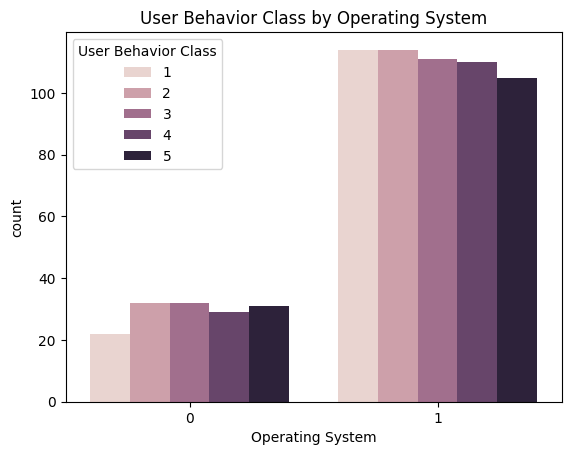

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns


# For KNN Classification (Problem 2)
def plot_knn_results():
    sns.countplot(x="Operating System", hue="User Behavior Class", data=df)
    plt.title("User Behavior Class by Operating System")
    plt.savefig('images/knn_classification.png')
    plt.show()

plot_knn_results()


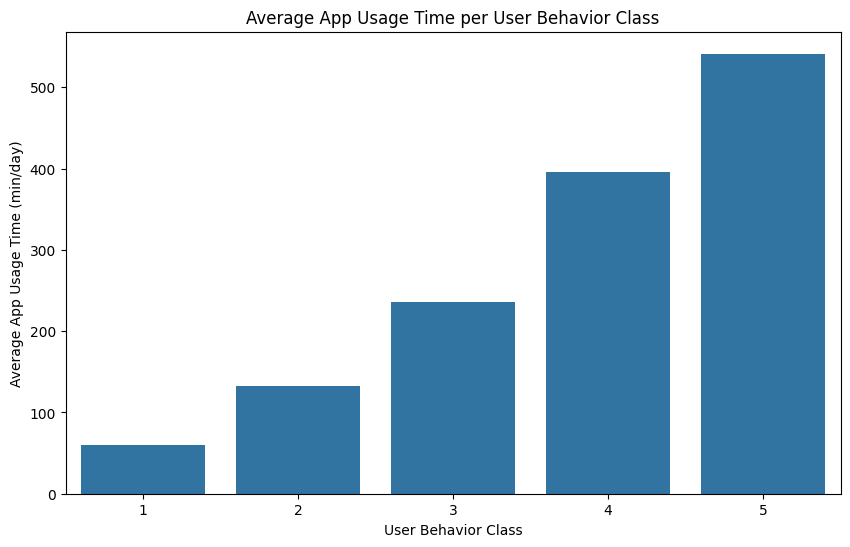

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure size
plt.figure(figsize=(10, 6))

# Plotting the average usage time per user behavior class
sns.barplot(
    data=df,
    x='User Behavior Class',
    y='App Usage Time (min/day)',
    errorbar=None,
    estimator='mean'
)

# Setting labels and title
plt.xlabel("User Behavior Class")
plt.ylabel("Average App Usage Time (min/day)")
plt.title("Average App Usage Time per User Behavior Class")
plt.savefig("images/avrage_usage.png")
# Display the plot
plt.show()


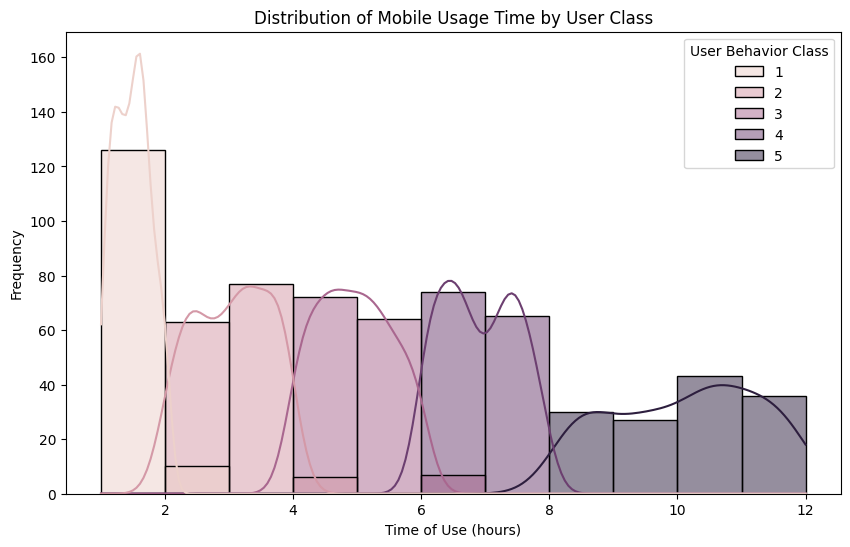

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Screen On Time (hours/day)', hue='User Behavior Class', kde=True)
plt.xlabel('Time of Use (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Mobile Usage Time by User Class')
plt.savefig('images/time_distribution_by_class.png')
plt.show()


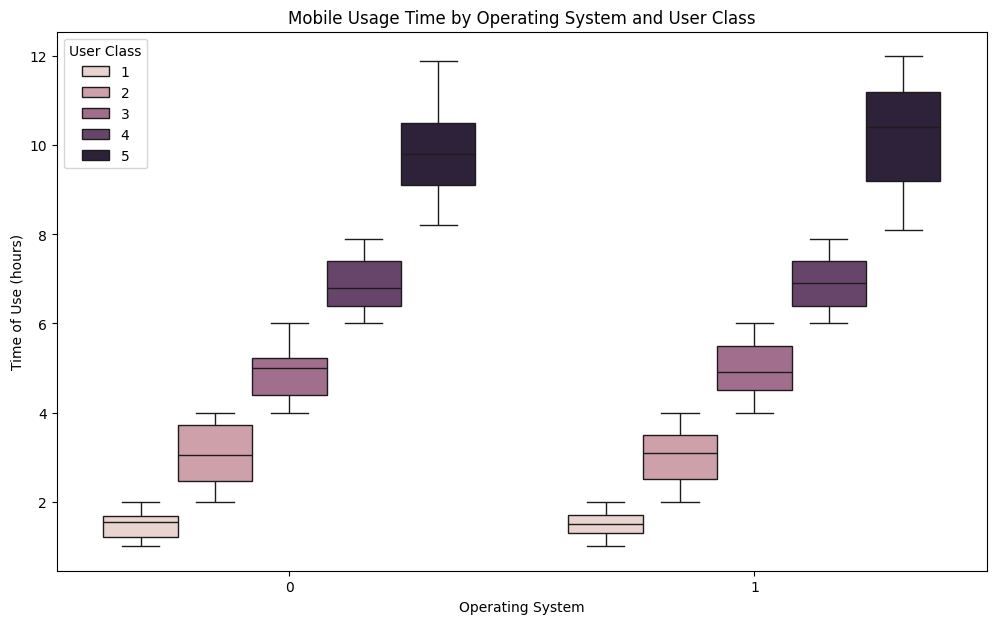

In [40]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Operating System', y='Screen On Time (hours/day)', hue='User Behavior Class')
plt.xlabel('Operating System')
plt.ylabel('Time of Use (hours)')
plt.title('Mobile Usage Time by Operating System and User Class')
plt.legend(title='User Class')
plt.savefig('images/time_by_os_and_class.png')
plt.show()


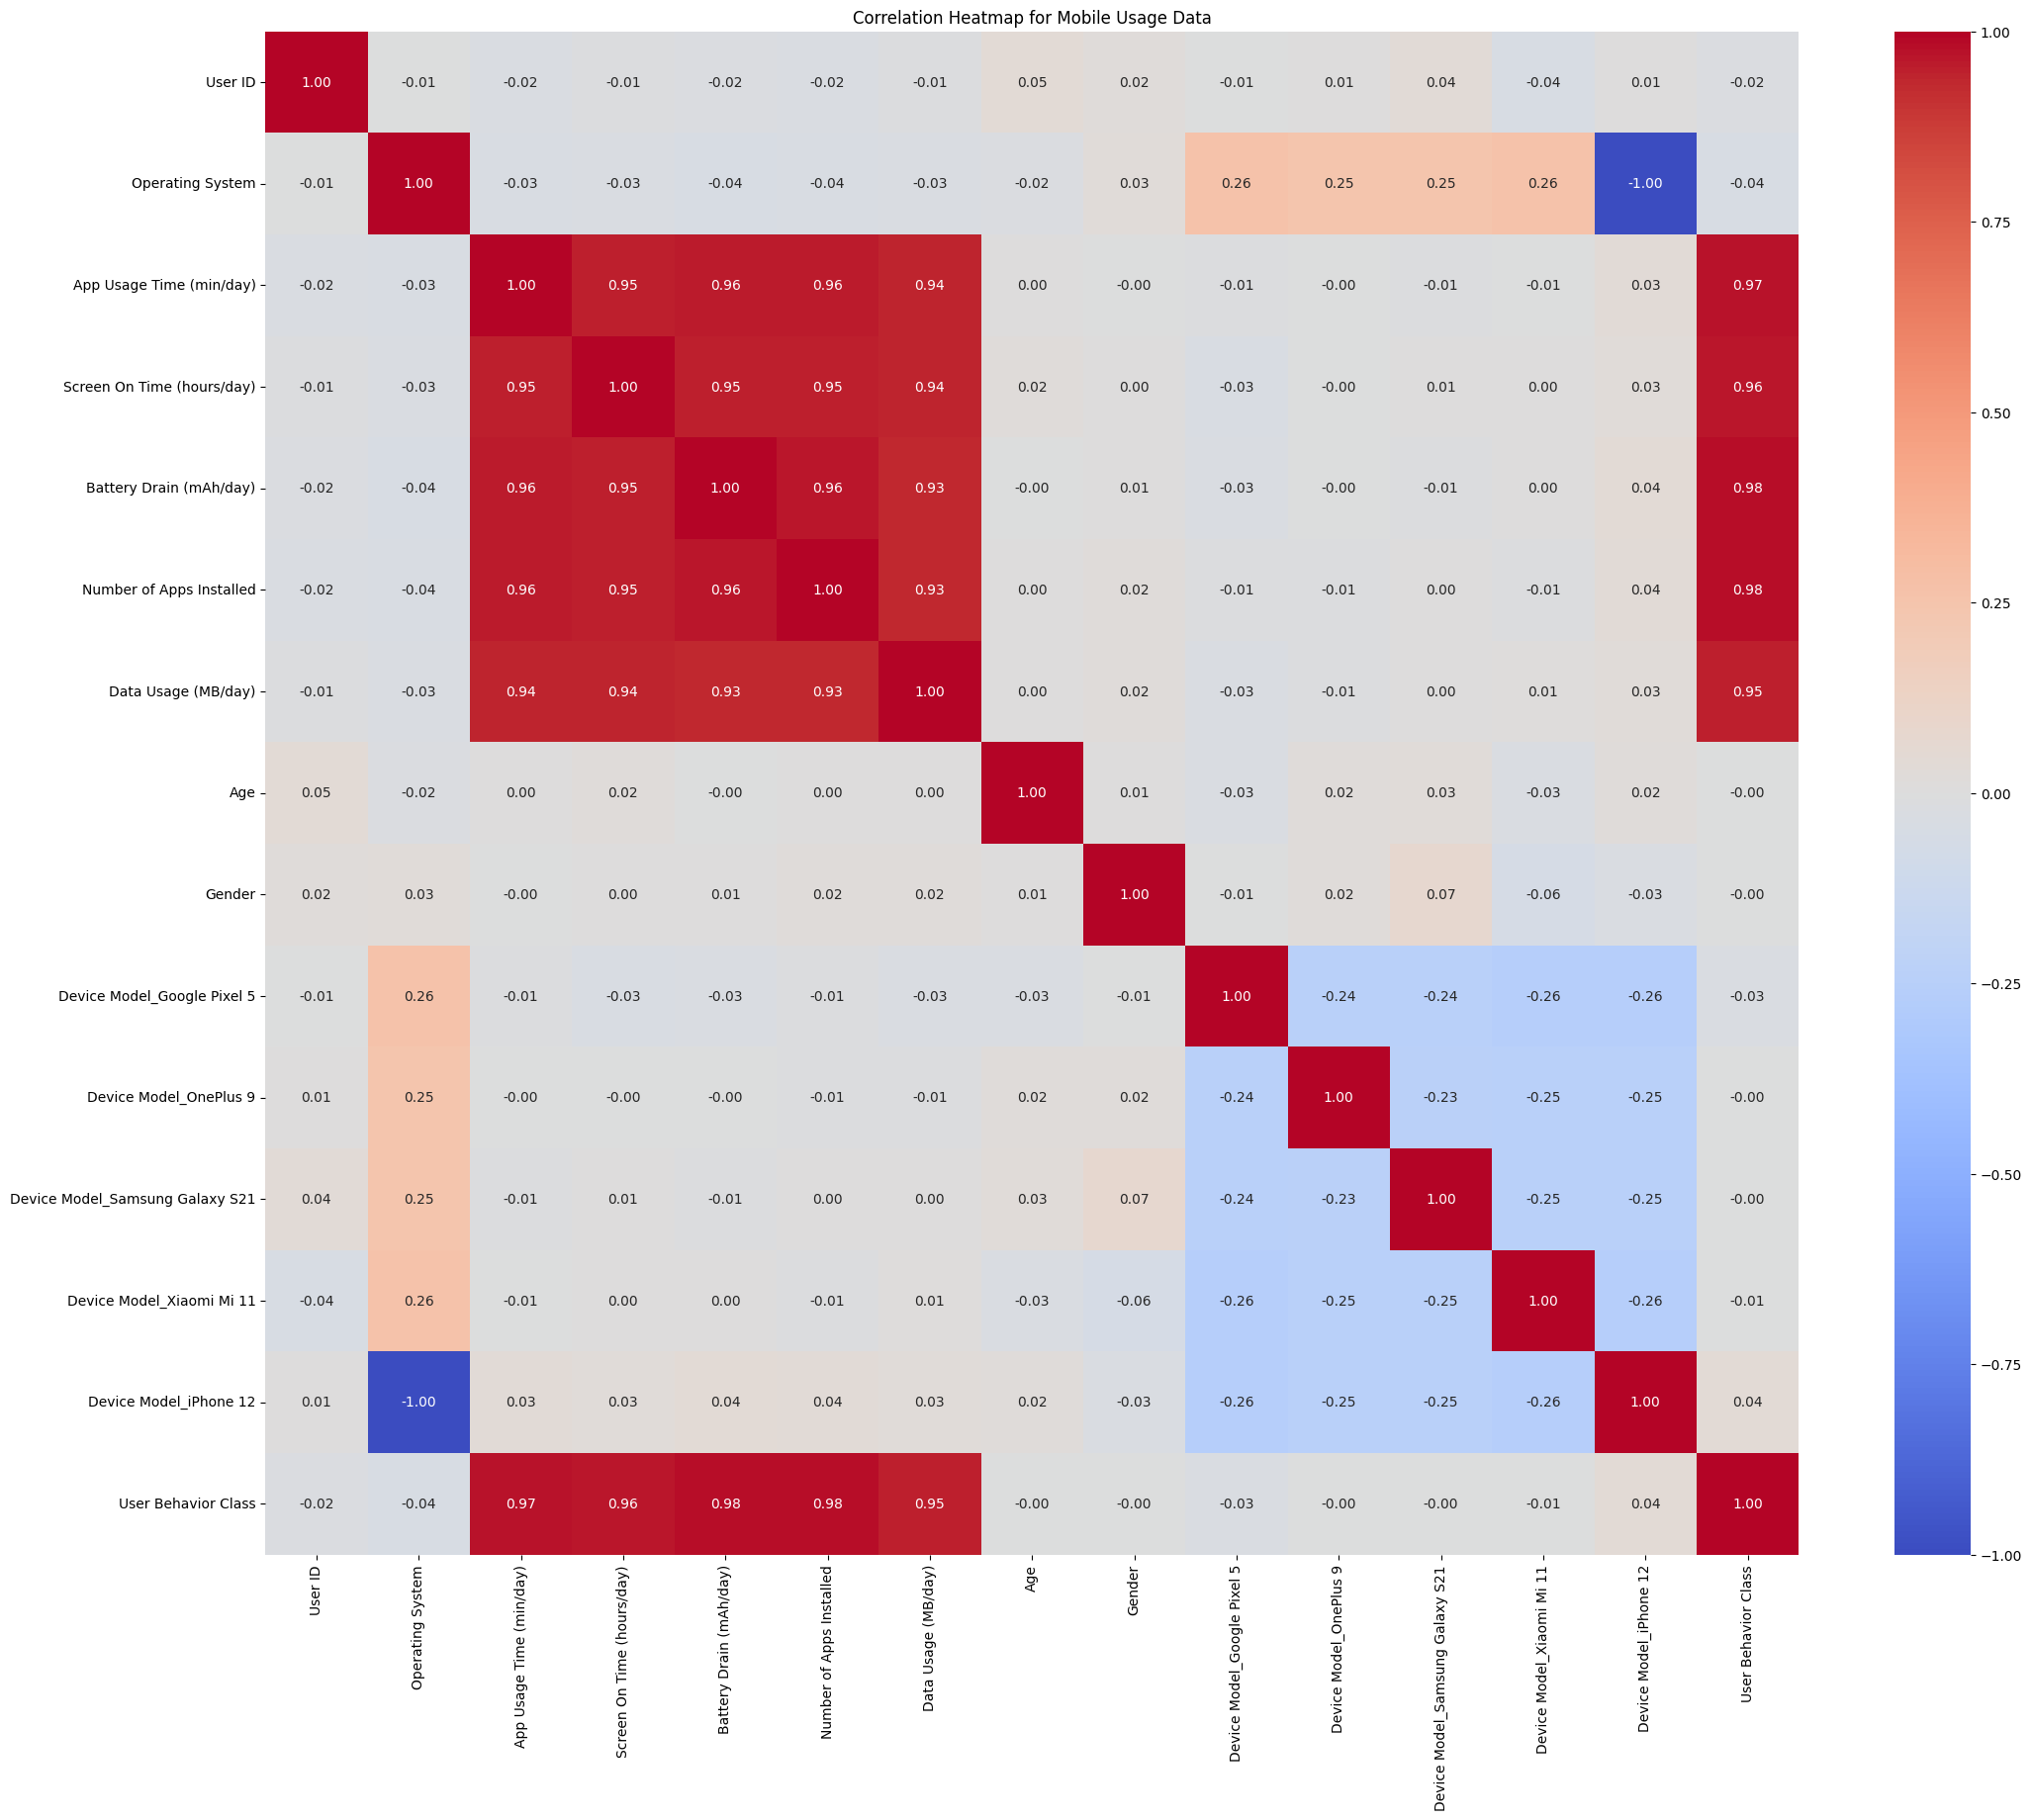

In [48]:
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Mobile Usage Data')
plt.savefig('images/correlation_heatmap.png')
plt.show()


## Some Questions may you ask 
#### 1- What dataset did you choose and why?
I cheesed `Mobile device usage and user behavior dataset` from [kaggle](https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset) 

- This dataset contained many numerical features.
- It had an interesting subject
- being a classification type, and what needed to be predicted was clear.

#### 2- What insights did you gain from the EDA?
- **Understanding Data Distributions:** Through the EDA, I observed that several features, such as `App Usage Time`, `ttery Drai`, and `Data Usage`, exhibited skewed distributions. This led me to consider __standardizing__ these features before training the model, ensuring that the scale differences didn’t affect the performance of distance-based algorithms like KNN.


- __Handling Missing or Inconsistent Data:__ The EDA revealed missing values and inconsistent data entries in categorical variables like `Gender` and `Operating System`. These were cleaned and transformed using proper techniques `(e.g., replacing missing values or encoding categorical variables)`, which helped maintain the quality of the dataset for training.

- __Importance of Feature Engineering:__ After analyzing the categorical variables, such as `Device Model`, I decided to create dummy variables to ensure the model could properly interpret categorical differences. This process of converting categorical features into numerical ones helped enhance the dataset's readiness for machine learning.
By applying these insights during data preprocessing, 

I was able to improve the model’s accuracy and ensure that the classification task was well-supported by the clean and transformed data.

### 3- What preprocessing steps were necessary for your dataset?
- __Handling Missing Values__
- __Encoding Categorical Variables:__ The dataset contained categorical features like `Operating System`, `Gender`, and `Device Model`. These needed to be transformed into __numerical values__ for the machine learning model to process. I applied `label encoding` for binary categorical variables (e.g., Operating System as Android = 1, iOS = 0) and `one-hot encoding` for multi-class categorical variables like `Device Model` to avoid introducing ordinal relationships.
### 4- What preprocessing steps were necessary for your dataset?
- __Handling Numerical Features:__ For continuous features like `App Usage Time (min/day)`, `Screen On Time (hours/day)`, `Battery Drain (mAh/day)`, and others, I used __standardization__. This step was crucial for KNN to ensure that all features contributed equally to the distance computation.

- __Handling Categorical Features:__ I encoded categorical variables like `Operating System` and `Gender` using numerical values `(e.g., Android = 1, iOS = 0, Male = 1, Female = 0)`. For Device Model, I applied one-hot encoding to represent each device as a binary column, ensuring that the categorical data was compatible with the KNN algorithm.

- __Addressing Missing Data:__ I checked the dataset for any missing values and verified that there were no significant gaps that needed to be handled.

### 5- What value of K did you find to be the best, and how did you determine that?
- __Range of K Values:__ I defined a range of K values from `1 to 30` to explore how different values of K would affect the model's performance. A low K value (e.g., K = 1) could lead to overfitting, where the model captures noise in the data, while a high K value might cause underfitting, where the model becomes too generalized.

- __Grid Search with Cross-Validation:__ I used `GridSearchCV`, a powerful tool for hyperparameter tuning, to systematically test each K value across this range. The grid search also tested different distance metrics `(p = 1 for Manhattan distance, p = 2 for Euclidean distance) and weighting schemes (uniform and distance weights)`.

- __Cross-Validation:__ I implemented `5-fold cross-validation` to evaluate each combination of K and other hyperparameters. This method split the training data into five subsets, trained the model on four of them, and validated it on the fifth. This process repeated five times, and the results were averaged, ensuring that the performance evaluation was reliable and not biased toward a specific subset of the data.


<hr>

## Thanks for watching 
#### _powered by fakeshinigami110_